# E-tivity 3: Clustering and Manifold Learning

Use this notebook to complete Tasks 1 and 2 in E-tivity3.

### Import Python Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold
from sklearn import cluster
from sklearn import preprocessing
from sklearn.metrics import silhouette_score

import random

### Task 1

- Download the dataset loans_dataset_et3.csv. This is a subset of the loans dataset used in the example notebooks for E-tivity1 and E-tivity2 which has only the examples with loan status Yes and preselected features. &#9745;

In [2]:
data = pd.read_csv('loans_dataset_et3.csv')
data.head()
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,332.000000,332.000000,332.000000,332.000000,332.000000
mean,5201.093373,1495.508795,140.882530,341.710843,0.978916
std,4584.815491,1982.742932,75.544237,61.651497,0.143882
min,645.000000,0.000000,17.000000,60.000000,0.000000
25%,2912.750000,0.000000,100.000000,360.000000,1.000000
50%,3858.500000,1211.500000,128.000000,360.000000,1.000000
75%,5818.250000,2250.000000,162.000000,360.000000,1.000000
max,39999.000000,20000.000000,600.000000,480.000000,1.000000


In [3]:
data.tail()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
327,5417,4196.0,267,360,1
328,16666,0.0,275,360,1
329,10750,0.0,312,360,1
330,5955,5625.0,315,360,1
331,6133,3906.0,324,360,1


In [4]:
data.dtypes

ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount             int64
Loan_Amount_Term       int64
Credit_History         int64
dtype: object

### B. Scale the Data
All attributes are numerical so we can proceed to scaling the data. To decide which scaler is suitable we will examine the distribution of our attributes


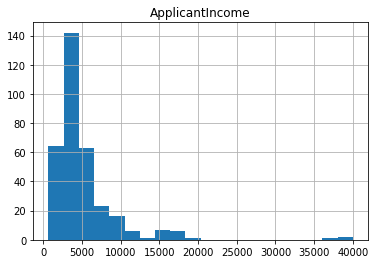

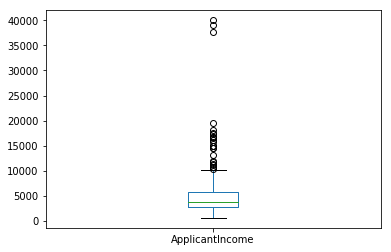

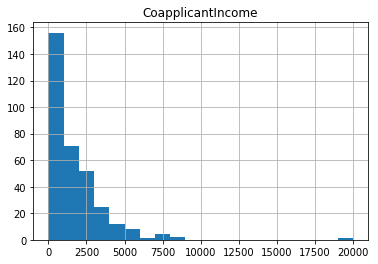

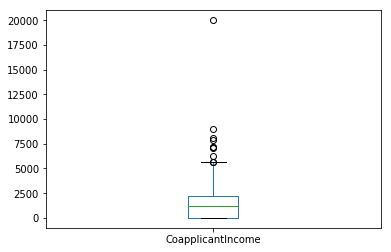

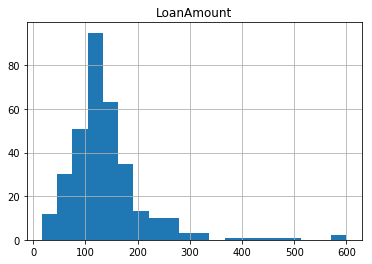

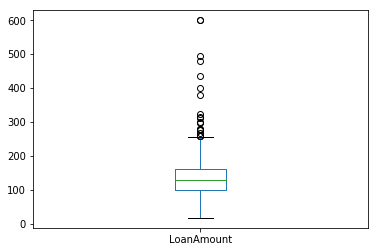

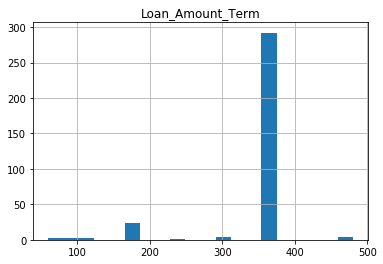

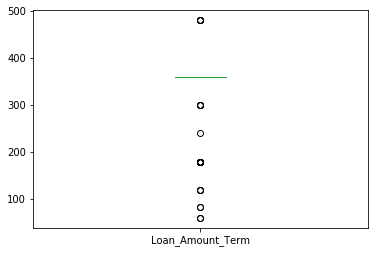

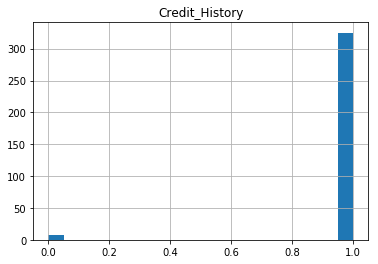

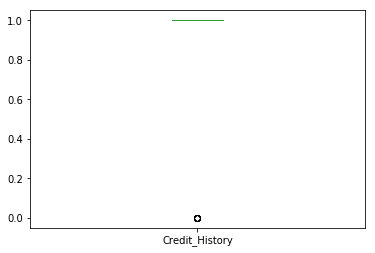

In [5]:
def plot_data(data):
    for col in data.columns:
        plt.title(col)
        data[col].hist(bins=20)
        plt.show()
        data[col].plot.box()
        plt.show()

plot_data(data)

A standard scaler transforms the data by removing the mean value of each feature to center it, then scale it by dividing non-constant features by their standard deviation.

As our dataset has many outliers we will be trying the sklearn robust scaler which is similar to a standard scaler except it uses more robust estimates for the center and range of the data. 

In [6]:
standard_scaler = preprocessing.StandardScaler()
standard_data = standard_scaler.fit_transform(data)
standard_dataframe = pd.DataFrame(standard_data, columns=data.columns)

robust_scaler = preprocessing.RobustScaler()
robust_data = robust_scaler.fit_transform(data)
robust_dataframe = pd.DataFrame(robust_data, columns=data.columns)

min_max_scaler = preprocessing.MinMaxScaler()
min_max_data = min_max_scaler.fit_transform(data)
min_max_dataframe = pd.DataFrame(min_max_data, columns=data.columns)

normalizer = preprocessing.Normalizer()
normal_data = normalizer.fit_transform(data)
normal_dataframe = pd.DataFrame(min_max_data, columns=data.columns)

normal_robust_data = standard_scaler.fit_transform(normal_data)
normal_robust_dataframe = pd.DataFrame(normal_robust_data, columns=data.columns)

robust_data_no_credit_history = robust_scaler.fit_transform(data.drop('Credit_History', axis=1))

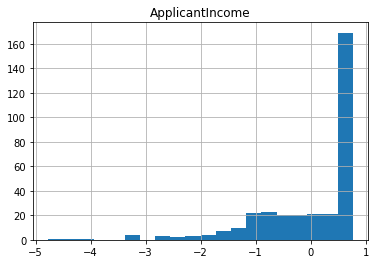

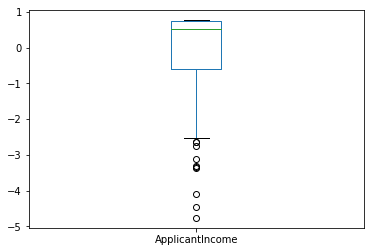

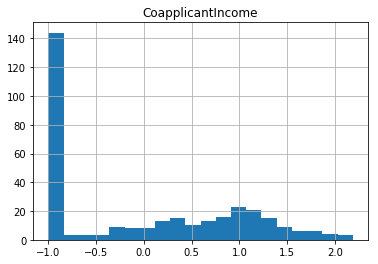

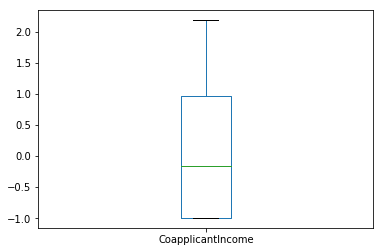

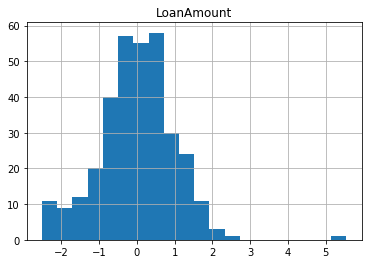

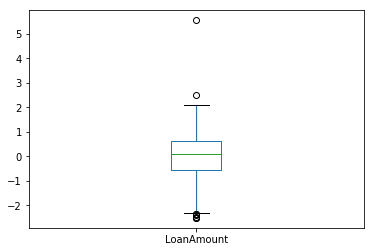

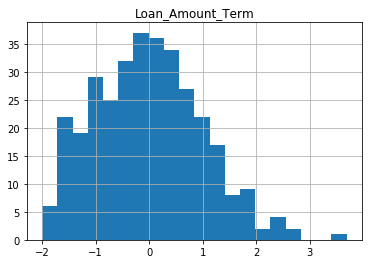

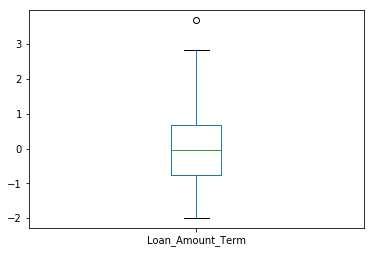

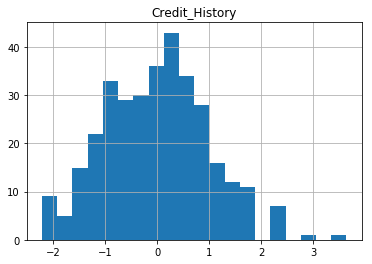

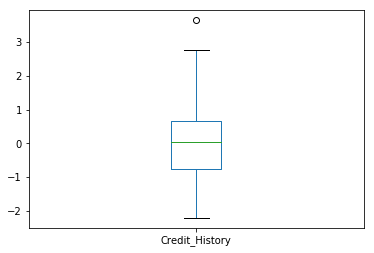

In [7]:
plot_data(normal_robust_dataframe)

In [8]:
### C. Scatterplot Function (to be used below for visualising a clustering)

colors = np.array(['orange', 'blue', 'lime', 'black', 'yellow', 'pink', 'grey', 'purple', 'orange', 'blue', 'lime', 'black', 'yellow', 'pink', 'grey', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot

def clustering_scatterplot(points, labels, centers, title):
    # plot the examples, i.e. the data points
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')
    plt.show()

In [9]:
def k_means(data, k):
    ### D. K-Means Clustering
    clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(data)

    ### E. Apply a manifold-learning technique to project the data set to a 2D space


    # append the cluster centers to the dataset
    data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

    #### E1. Apply multi-dimensional scaling (MDS) to project both the data and the k-Means cluster centers to a 2D space

    # project both the data and the k-Means cluster centers to a 2D space
    XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
    print("transformation complete")

    # plot the transformed examples and the centers
    # use the cluster assignment to colour the examples
    clustering_scatterplot(points=XYcoordinates[:-k,:], 
                           labels=clustered_data_sklearn.labels_, 
                           centers=XYcoordinates[-k:,:], 
                           title='MDS')
    #### E2. Apply t-SNE to project both the data and the k-Means cluster centers to a 2D space

    # project both th data and the k-Means cluster centers to a 2D space
    XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
    print("transformation complete")

    # plot the transformed examples and the centers
    # use the cluster assignment to colour the examples
    # plot the transformed examples and the centers
    # use the cluster assignment to colour the examples
    clustering_scatterplot(points=XYcoordinates[:-k,:], 
                           labels=clustered_data_sklearn.labels_,
                           centers=XYcoordinates[-k:,:], 
                           title='TSNE')
    return clustered_data_sklearn, data_and_centers

transformation complete


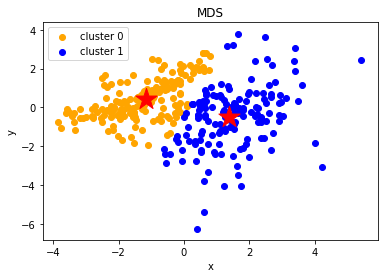

transformation complete


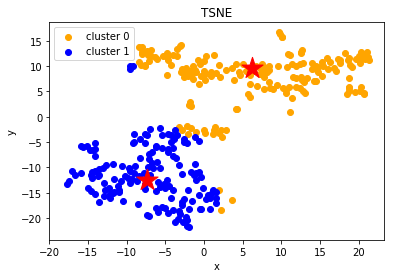

transformation complete


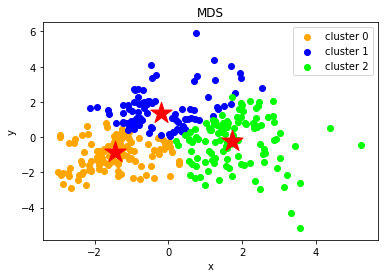

transformation complete


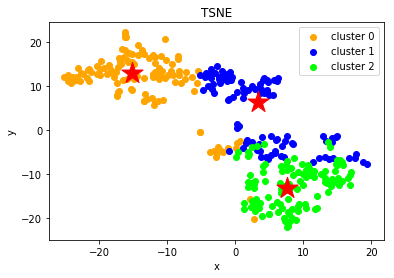

transformation complete


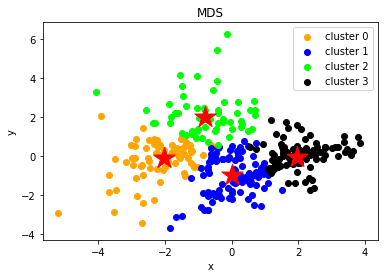

transformation complete


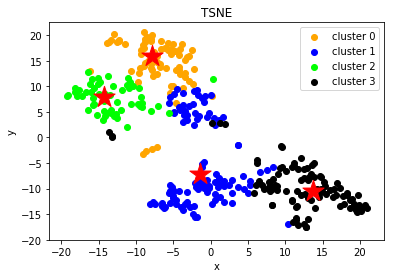

transformation complete


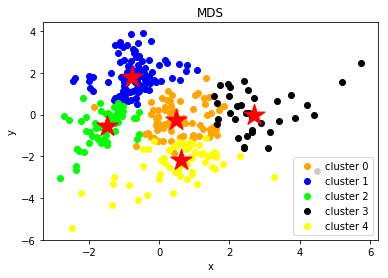

transformation complete


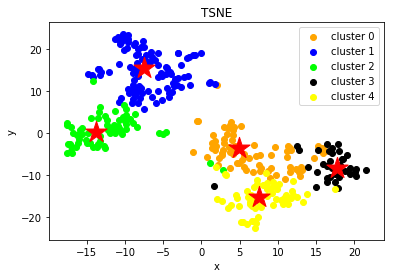

transformation complete


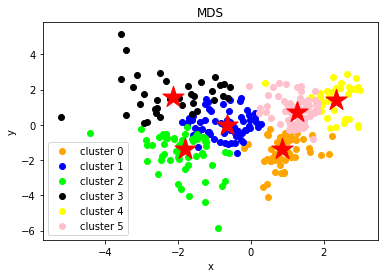

transformation complete


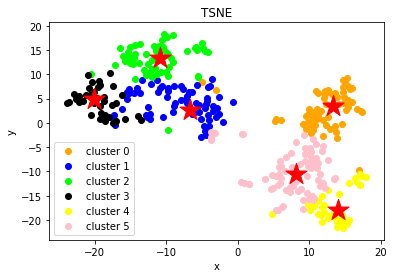

transformation complete


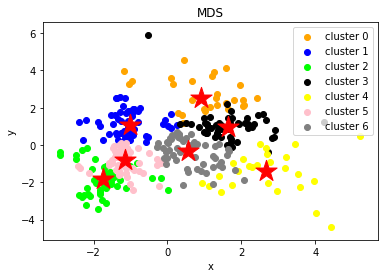

transformation complete


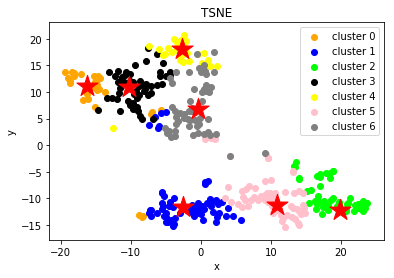

In [10]:
results = dict()
for i in range(2,8):
    results[i] = k_means(normal_robust_data, i)

In [11]:
data['cluster'] = pd.Series(results[4][0].labels_, index=data.index)

In [12]:
data.mean()

ApplicantIncome      5201.093373
CoapplicantIncome    1495.508795
LoanAmount            140.882530
Loan_Amount_Term      341.710843
Credit_History          0.978916
cluster                 1.539157
dtype: float64

In [13]:
data.groupby('cluster').mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
cluster,,,,,
0,2486.328767,1888.972603,116.671233,359.178082,1.000000
1,3771.819048,597.008762,110.438095,348.457143,1.000000
2,3889.750000,4589.767857,173.410714,333.214286,0.964286
3,9504.020408,396.948980,172.948980,326.326531,0.948980


Our clusters seems to imply the following information:
 - group 0 contains applications for applicant has a significantly above average income and coapplicant has above average income and they are looking for an above average loan.
 - group 1 contains applications where both the applicant and co applicant are looking for a loan which is less than average
 - group 2 contains applications where applicant has lower than average income while coappliant has a significantly above average income
 - group 3 contains those with a bad credit history
 - group 1 contains applications where the applicant has average income while the coapplicant has below average income for a small loan over short term
 
**Note that this conclusion is true for this run of k-Means. If the code is executed again, k-Means may produce either different clusters or the same clusters but in a different order.

Plot the sum of squared distances from the data points (in loans_dataset_et3.csv) to the centers of the k-Means clusters for various values of k. Use the Elbow method to pick the best value of k.

In [14]:
data.values

array([[2.483e+03, 2.466e+03, 9.000e+01, 1.800e+02, 0.000e+00, 2.000e+00],
       [4.917e+03, 0.000e+00, 1.300e+02, 3.600e+02, 0.000e+00, 3.000e+00],
       [4.106e+03, 0.000e+00, 4.000e+01, 1.800e+02, 1.000e+00, 3.000e+00],
       ...,
       [1.075e+04, 0.000e+00, 3.120e+02, 3.600e+02, 1.000e+00, 3.000e+00],
       [5.955e+03, 5.625e+03, 3.150e+02, 3.600e+02, 1.000e+00, 2.000e+00],
       [6.133e+03, 3.906e+03, 3.240e+02, 3.600e+02, 1.000e+00, 2.000e+00]])

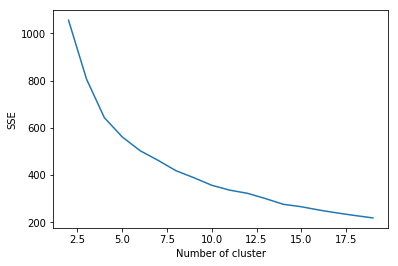

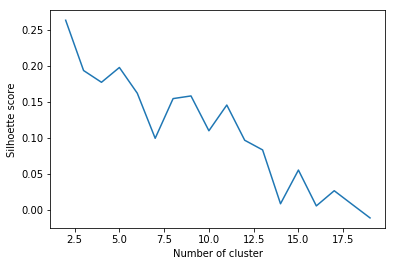

In [15]:
sse = {}
sil = {}
for k in range(2,20):
    kmeans = cluster.KMeans(n_clusters=k, max_iter=1000).fit(normal_robust_data)
    label = kmeans.labels_
    sil_coeff = silhouette_score(data, label, metric='euclidean')
    sil[k] = sil_coeff
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()
plt.figure()
plt.plot(list(sil.keys()), list(sil.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhoette score")
plt.show()

For k means clustering the optimum number of clusters would appear to be 4 using the elbow of the above graph showing the SSE error for increasing numbers of clusters 

and for the silhoette score (The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.) we can see that 2 is the optimum number of clusters. 

we will now use our previously collected 2 group k means and secribe the clusters

In [16]:
data['cluster'] = pd.Series(results[2][0].labels_, index=data.index)

In [17]:
data.drop('cluster', axis=1).mean()

ApplicantIncome      5201.093373
CoapplicantIncome    1495.508795
LoanAmount            140.882530
Loan_Amount_Term      341.710843
Credit_History          0.978916
dtype: float64

In [18]:
data.groupby('cluster').mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
cluster,,,,,
0,6944.227778,395.245111,143.088889,335.933333,0.972222
1,3136.855263,2798.452631,138.269737,348.552632,0.986842


In [19]:
data.drop('cluster', axis=1, inplace=True)

This clustering seems to primarily be clustering on high applicant income for cluster 0 and high coapplicantIncome for cluster 2

transformation complete


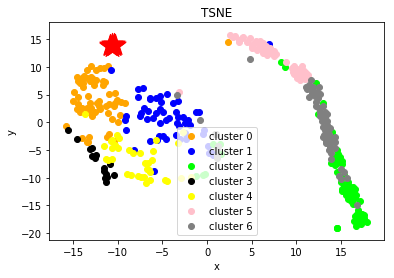

In [20]:
from sklearn.cluster import AffinityPropagation

X = normal_robust_data

# #############################################################################
# Compute Affinity Propagation
af = AffinityPropagation(preference=-50).fit(X)
cluster_centers = af.cluster_centers_
cluster_centers_indices = af.cluster_centers_indices_
n_clusters = len(cluster_centers_indices)

# append the cluster centers to the dataset
data_and_centers = np.r_[data,cluster_centers]

# project both the data and the cluster centers to a 2D space
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

# plot the transformed examples and the centers
# use the cluster assignment to colour the examples
clustering_scatterplot(points=XYcoordinates[:-n_clusters,:], 
                       labels=af.labels_, 
                       centers=XYcoordinates[-n_clusters:,:], 
                       title='TSNE')

### Difference between k means and affinity propogation

with kmeans the data is clustered by minimizing the within-cluster Euclidean distance for n clusters of equal variance.

affinity works by sending messsages between each pair of samples until they converge on points known as eqemplars i.e. the points which most represent the data in each cluster.

key difference is that k means requires a specified number of clusters while affinity propogation discovers it's own optimum number of clusters.